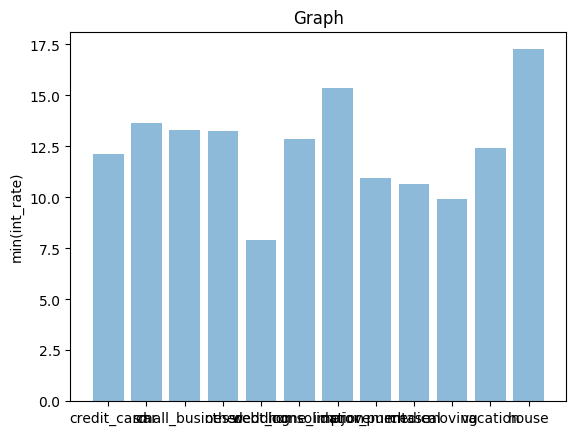

In [103]:
import csv
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from itertools import tee
try:
    from itertools import izip as zip
except ImportError: # will be 3.x series
    pass


#definition to get the next row
def next_row(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

data = pd.read_csv('data.csv')

purposes = []#this will store all the different purposes

#create a new csv file to store the results 
with open('avg_int_per_purpose.csv', 'w') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',', quotechar = '|', quoting=csv.QUOTE_MINIMAL)
        csvRow=[' ','purpose', 'avg_rate']
        filewriter.writerow(csvRow)


for p in data['purpose']:
    if p in purposes:
        next_row(data)
    else:
        newPurpose = p
        purposes.append(newPurpose)
with open('data.csv') as datafile:
    next(datafile)
    readFile = csv.reader(datafile, delimiter=",")
    theSum = 0
    current = 0
    countElements = 0
    countPurposes = 0 
    averages = []
    for purpose in purposes:
        datafile.seek(0)
        countElements = 0
        current = 0
        theSum = 0
        average = 0
        for row in readFile:
            currPurpose = row[16]
            if(currPurpose == purpose):
                countElements += 1 
                current = float(row[5])
                theSum += current
        if(countElements != 0):
            average = theSum/countElements
            averages.append(average)
        csvRow = [countPurposes, purpose, average]
        with open('avg_int_per_purpose.csv', 'a') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(csvRow)
        csvFile.close()
        countPurposes += 1

#build graph
y_pos = np.arange(len(purposes))

plt.bar(y_pos, averages, align='center', alpha=0.5) 
plt.xticks(y_pos, purposes)
plt.ylabel('min(int_rate)')
plt.title('Graph')
                
plt.show()